In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("../vehicles_us.csv")

# Mostrar las primeras 5 filas
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [2]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [3]:
df = df.copy()  # Para evitar problemas de copias

# Rellenar valores nulos de manera correcta
df["model_year"] = df["model_year"].fillna(df["model_year"].median())
df["cylinders"] = df["cylinders"].fillna(df["cylinders"].mode()[0])
df["odometer"] = df["odometer"].fillna(df["odometer"].median())
df["paint_color"] = df["paint_color"].fillna("unknown")
df["is_4wd"] = df["is_4wd"].fillna(0)

# Verificamos nuevamente si aún hay valores nulos
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

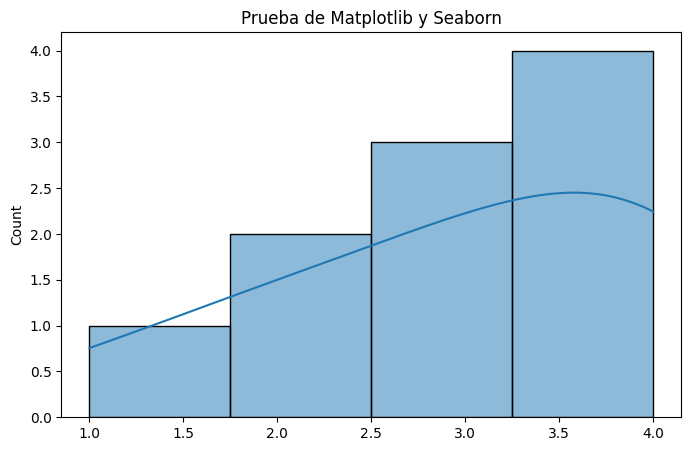

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot([1, 2, 2, 3, 3, 3, 4, 4, 4, 4], bins=4, kde=True)
plt.title("Prueba de Matplotlib y Seaborn")
plt.show()

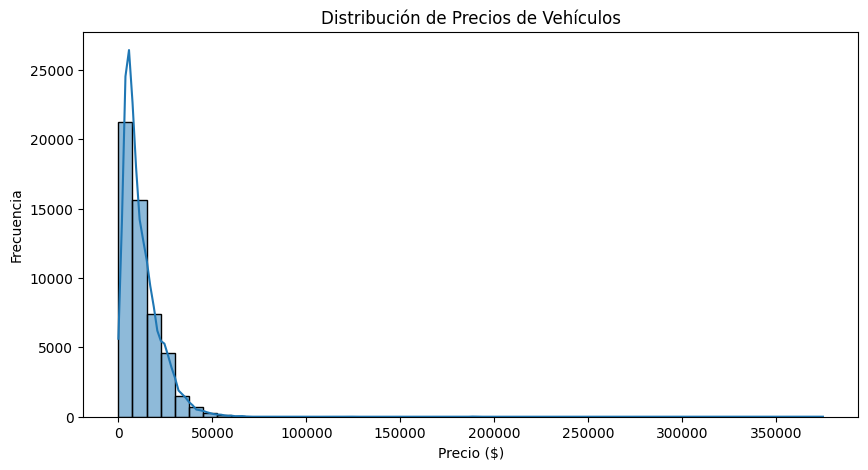

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribución de Precios de Vehículos")
plt.xlabel("Precio ($)")
plt.ylabel("Frecuencia")
plt.show()


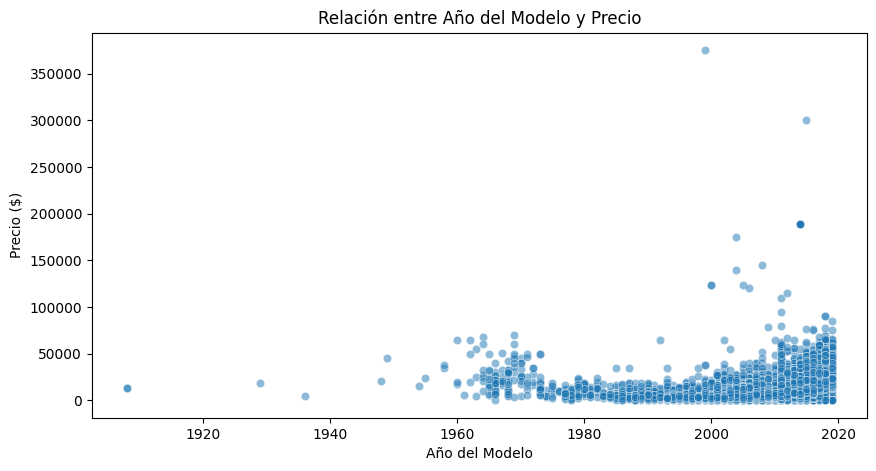

In [6]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="model_year", y="price", alpha=0.5)
plt.title("Relación entre Año del Modelo y Precio")
plt.xlabel("Año del Modelo")
plt.ylabel("Precio ($)")
plt.show()


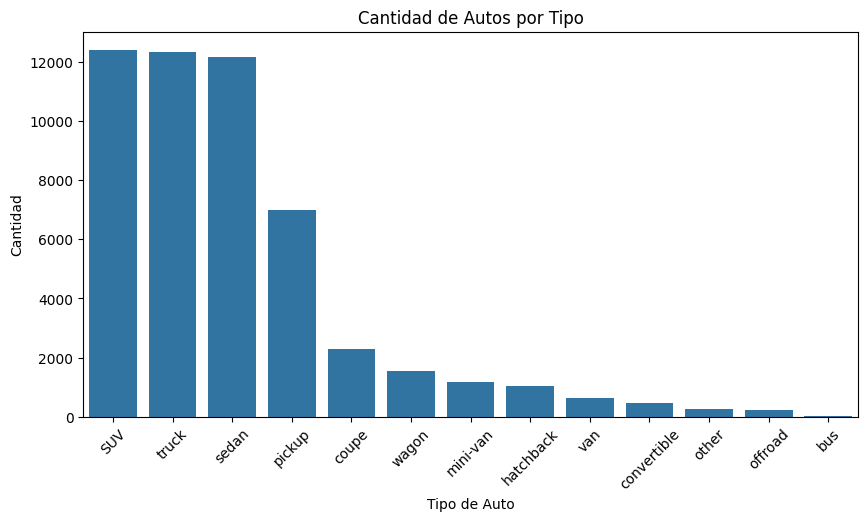

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="type", order=df["type"].value_counts().index)
plt.title("Cantidad de Autos por Tipo")
plt.xlabel("Tipo de Auto")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


Resumen del Análisis Exploratorio
Distribución de Precios:

La mayoría de los autos tienen un precio entre 0 y 50,000 USD.
Hay valores extremos (outliers) con precios muy altos.
Puede haber datos erróneos en los precios bajos (ej. autos a 0 USD).
Relación Año del Modelo vs Precio:

Tendencia clara: Autos más recientes suelen ser más caros.
Aumento en precios de autos de 1970: Puede deberse a coches clásicos o de colección.
Hay autos antiguos con precios anormalmente altos, lo que sugiere posibles errores en los datos o rarezas del mercado.
Cantidad de Autos por Tipo:

SUVs, Trucks y Sedanes dominan el mercado.
Buses, convertibles y off-road son los menos comunes.

In [10]:
df = df[df["price"] > 100]  # Filtra autos con precio mayor a 100 USD

# Verifica que ya no haya precios menores a 100
df["price"].describe()

count    50645.000000
mean     12284.266502
std       9462.595401
min        105.000000
25%       5300.000000
50%       9495.000000
75%      16925.000000
max      94955.000000
Name: price, dtype: float64

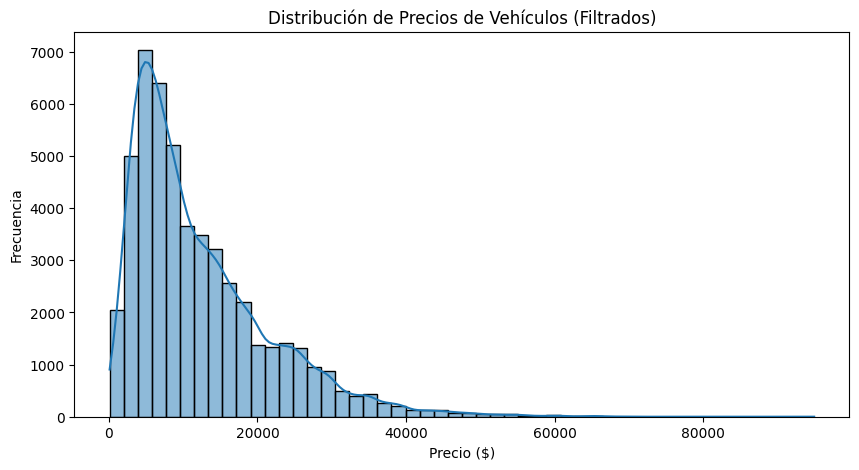

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribución de Precios de Vehículos (Filtrados)")
plt.xlabel("Precio ($)")
plt.ylabel("Frecuencia")
plt.show()


In [12]:
df[df["price"] <= 100]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [13]:
df["price"].min()

np.int64(105)